# 502 Final Project

We are predicting Deaths and Recovered.

Link to Kaggle Dataset: https://www.kaggle.com/datasets/mariaren/covid19-healthy-diet-dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
import statsmodels.api as sm 
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn import linear_model
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFECV
import xgboost as xgb
from sklearn.svm import SVR

/Users/duy-anh/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
fat_intake = pd.read_csv('Fat_Supply_Quantity_Data.csv')
cal_intake = pd.read_csv('Food_Supply_kcal_Data.csv')
food_intake = pd.read_csv('Food_Supply_Quantity_kg_Data.csv')
protein_intake = pd.read_csv('Protein_Supply_Quantity_Data.csv')
desc = pd.read_csv('Supply_Food_Data_Descriptions.csv')
desc

Categories  \
0        Alcoholic Beverages   
1                Animal fats   
2            Animal Products   
3    Aquatic Products, Other   
4   Cereals - Excluding Beer   
5                       Eggs   
6              Fish, Seafood   
7    Fruits - Excluding Wine   
8                       Meat   
9    Milk - Excluding Butter   
10             Miscellaneous   
11                    Offals   
12                  Oilcrops   
13                    Pulses   
14                    Spices   
15             Starchy Roots   
16                Stimulants   
17        Sugar & Sweeteners   
18               Sugar Crops   
19                  Treenuts   
20            Vegetable Oils   
21                Vegetables   
22          Vegetal Products   

                                                Items  
0   Alcohol, Non-Food; Beer; Beverages, Alcoholic;...  
1   Butter, Ghee; Cream; Fats, Animals, Raw; Fish,...  
2   Aquatic Animals, Others; Aquatic Plants; Bovin...  
3   Aquatic Animals, Others; Aquatic Plants; Meat,...  
4   Barley and products; Cereals, Other; Maize and...  
5                                                Eggs  
6   Cephalopods; Crustaceans; Demersal Fish; Fresh...  
7   Apples and products; Bananas; Citrus, Other; D...  
8   Bovine Meat; Meat, Other; Mutton & Goat Meat; ...  
9                             Milk - Excluding Butter  
10                         Infant food; Miscellaneous  
11                                     Offals, Edible  
12  Coconuts - Incl Copra; Cottonseed; Groundnuts ...  
13            Beans; Peas; Pulses, Other and products  
14             Cloves; Pepper; Pimento; Spices, Other  
15  Cassava and products; Potatoes and products; R...  
16  Cocoa Beans and products; Coffee and products;...  
17  Honey; Sugar (Raw Equivalent); Sugar non-centr...  
18                             Sugar beet; Sugar cane  
19                                  Nuts and products  
20  Coconut Oil; Cottonseed Oil; Groundnut Oil; Ma...  
21   Onions; Tomatoes and products; Vegetables, Other  
22  Alcohol, Non-Food; Apples and products; Banana...

In [3]:
fat_intake[['Country','Obesity','Population']].sort_values(by = 'Obesity', ascending = False)


Country  Obesity   Population
80                   Kiribati     45.6     125000.0
131                     Samoa     45.5     200000.0
161  United States of America     37.3  329878000.0
83                     Kuwait     37.0    4691000.0
133              Saudi Arabia     35.0   35041000.0
..                        ...      ...          ...
150               Timor-Leste      2.9    1318000.0
166                   Vietnam      2.1   96209000.0
52           French Polynesia      NaN     280000.0
109             New Caledonia      NaN     295000.0
147                   Taiwan*      NaN   23610000.0

[170 rows x 3 columns]

The USA is the largest country with the third largest obesity. Kiribati and Samoa both have under 1 million population and their obesity rates suffered due to the introduction of western food products. 

In [4]:
fat_intake[['Country','Obesity']].sort_values(by = 'Obesity', ascending = False)

Country  Obesity
80                   Kiribati     45.6
131                     Samoa     45.5
161  United States of America     37.3
83                     Kuwait     37.0
133              Saudi Arabia     35.0
..                        ...      ...
150               Timor-Leste      2.9
166                   Vietnam      2.1
52           French Polynesia      NaN
109             New Caledonia      NaN
147                   Taiwan*      NaN

[170 rows x 2 columns]

In [5]:
fat_intake

Country  Alcoholic Beverages  Animal Products  \
0                           Afghanistan               0.0000          21.6397   
1                               Albania               0.0000          32.0002   
2                               Algeria               0.0000          14.4175   
3                                Angola               0.0000          15.3041   
4                   Antigua and Barbuda               0.0000          27.7033   
..                                  ...                  ...              ...   
165  Venezuela (Bolivarian Republic of)               0.0000          16.3261   
166                             Vietnam               0.0000          33.2484   
167                               Yemen               0.0000          12.5401   
168                              Zambia               0.0783           9.6005   
169                            Zimbabwe               0.0000          10.3796   

     Animal fats  Aquatic Products, Other  Cereals - Excluding Beer    Eggs  \
0         6.2224                      0.0                    8.0353  0.6859   
1         3.4172                      0.0                    2.6734  1.6448   
2         0.8972                      0.0                    4.2035  1.2171   
3         1.3130                      0.0                    6.5545  0.1539   
4         4.6686                      0.0                    3.2153  0.3872   
..           ...                      ...                       ...     ...   
165       2.2673                      0.0                    2.5449  0.6555   
166       3.8238                      0.0                    3.7155  0.7839   
167       2.0131                      0.0                   11.5271  0.5514   
168       1.6113                      0.0                   14.3225  0.6266   
169       2.9543                      0.0                    9.7922  0.3682   

     Fish, Seafood  Fruits - Excluding Wine     Meat  ...  Vegetable Oils  \
0           0.0327                   0.4246   6.1244  ...         17.0831   
1           0.1445                   0.6418   8.7428  ...          9.2443   
2           0.2008                   0.5772   3.8961  ...         27.3606   
3           1.4155                   0.3488  11.0268  ...         22.4638   
4           1.5263                   1.2177  14.3202  ...         14.4436   
..             ...                      ...      ...  ...             ...   
165         0.5707                   0.9640   7.0949  ...         29.5211   
166         1.1217                   0.4079  26.4292  ...          5.6211   
167         0.3847                   0.2564   8.0010  ...         23.6312   
168         1.0070                   0.1343   4.9010  ...         15.2848   
169         0.2455                   0.0614   4.5674  ...         26.9396   

     Vegetables  Obesity  Undernourished  Confirmed    Deaths  Recovered  \
0        0.3593      4.5            29.8   0.142134  0.006186   0.123374   
1        0.6503     22.3             6.2   2.967301  0.050951   1.792636   
2        0.5145     26.6             3.9   0.244897  0.006558   0.167572   
3        0.1231      6.8              25   0.061687  0.001461   0.056808   
4        0.2469     19.1             NaN   0.293878  0.007143   0.190816   
..          ...      ...             ...        ...       ...        ...   
165      0.1851     25.2            21.2   0.452585  0.004287   0.424399   
166      0.6373      2.1             9.3   0.002063  0.000036   0.001526   
167      0.1667     14.1            38.9   0.007131  0.002062   0.004788   
168      0.1567      6.5            46.7   0.334133  0.004564   0.290524   
169      0.0789     12.3            51.3   0.232033  0.008854   0.190964   

       Active  Population  Unit (all except Population)  
0    0.012574  38928000.0                             %  
1    1.123714   2838000.0                             %  
2    0.070767  44357000.0                             %  
3    0.003419  32522000.0               

In [6]:
cal_intake

Country  Alcoholic Beverages  Animal Products  \
0                           Afghanistan               0.0000           4.7774   
1                               Albania               0.9120          16.0930   
2                               Algeria               0.0896           6.0326   
3                                Angola               1.9388           4.6927   
4                   Antigua and Barbuda               2.3041          15.3672   
..                                  ...                  ...              ...   
165  Venezuela (Bolivarian Republic of)               0.8454           7.2303   
166                             Vietnam               0.7150          10.9806   
167                               Yemen               0.0000           3.4667   
168                              Zambia               1.1925           3.3043   
169                            Zimbabwe               1.4269           3.9356   

     Animal fats  Aquatic Products, Other  Cereals - Excluding Beer    Eggs  \
0         0.8504                      0.0                   37.1186  0.1501   
1         1.0591                      0.0                   16.2107  0.8091   
2         0.1941                      0.0                   25.0112  0.4181   
3         0.2644                      0.0                   18.3521  0.0441   
4         1.5429                      0.0                   13.7215  0.2057   
..           ...                      ...                       ...     ...   
165       0.6007                      0.0                   21.3126  0.2892   
166       0.9363                      0.0                   26.9833  0.2894   
167       0.3394                      0.0                   32.0727  0.1455   
168       0.3230                      0.0                   31.5528  0.1988   
169       0.6904                      0.0                   29.8044  0.1381   

     Fish, Seafood  Fruits - Excluding Wine    Meat  ...  Vegetable Oils  \
0           0.0000                   1.4757  1.2006  ...          2.3012   
1           0.1471                   3.8982  3.8688  ...          2.8244   
2           0.1195                   3.1805  1.2543  ...          5.7638   
3           0.8372                   2.3133  2.9302  ...          4.2741   
4           1.7280                   3.6824  7.0356  ...          4.6904   
..             ...                      ...     ...  ...             ...   
165         0.4449                   2.3804  3.1368  ...          7.5417   
166         1.0385                   1.8046  7.8311  ...          1.3279   
167         0.1697                   1.1879  2.0121  ...          3.9515   
168         0.5714                   0.2236  1.5155  ...          3.0062   
169         0.1611                   0.4373  1.7491  ...          6.2601   

     Vegetables  Obesity  Undernourished  Confirmed    Deaths  Recovered  \
0        0.7504      4.5            29.8   0.142134  0.006186   0.123374   
1        2.7508     22.3             6.2   2.967301  0.050951   1.792636   
2        2.0457     26.6             3.9   0.244897  0.006558   0.167572   
3        0.3525      6.8              25   0.061687  0.001461   0.056808   
4        1.2960     19.1             NaN   0.293878  0.007143   0.190816   
..          ...      ...             ...        ...       ...        ...   
165      0.6674     25.2            21.2   0.452585  0.004287   0.424399   
166      1.9578      2.1             9.3   0.002063  0.000036   0.001526   
167      0.3636     14.1            38.9   0.007131  0.002062   0.004788   
168      0.4472      6.5            46.7   0.334133  0.004564   0.290524   
169      0.2532     12.3            51.3   0.232033  0.008854   0.190964   

       Active  Population  Unit (all except Population)  
0    0.012574  38928000.0                             %  
1    1.123714   2838000.0                             %  
2    0.070767  44357000.0                             %  
3    0.003419  32522000.0                           

In [7]:
food_intake

Country  Alcoholic Beverages  Animal fats  \
0                           Afghanistan               0.0014       0.1973   
1                               Albania               1.6719       0.1357   
2                               Algeria               0.2711       0.0282   
3                                Angola               5.8087       0.0560   
4                   Antigua and Barbuda               3.5764       0.0087   
..                                  ...                  ...          ...   
165  Venezuela (Bolivarian Republic of)               2.5952       0.0403   
166                             Vietnam               1.4591       0.1640   
167                               Yemen               0.0364       0.0446   
168                              Zambia               5.7360       0.0829   
169                            Zimbabwe               4.0552       0.0755   

     Animal Products  Aquatic Products, Other  Cereals - Excluding Beer  \
0             9.4341                   0.0000                   24.8097   
1            18.7684                   0.0000                    5.7817   
2             9.6334                   0.0000                   13.6816   
3             4.9278                   0.0000                    9.1085   
4            16.6613                   0.0000                    5.9960   
..               ...                      ...                       ...   
165          14.7565                   0.0000                   12.9253   
166           8.5765                   0.0042                   16.8740   
167           5.7874                   0.0000                   27.2077   
168           6.0197                   0.0000                   21.1938   
169           8.1489                   0.0000                   22.6240   

       Eggs  Fish, Seafood  Fruits - Excluding Wine    Meat  ...  Vegetables  \
0    0.2099         0.0350                   5.3495  1.2020  ...      6.7642   
1    0.5815         0.2126                   6.7861  1.8845  ...     11.7753   
2    0.5277         0.2416                   6.3801  1.1305  ...     11.6484   
3    0.0587         1.7707                   6.0005  2.0571  ...      2.3041   
4    0.2274         4.1489                  10.7451  5.6888  ...      5.4495   
..      ...            ...                      ...     ...  ...         ...   
165  0.3389         0.9456                   7.6460  3.8328  ...      4.1474   
166  0.3077         2.6392                   5.9029  4.4382  ...     11.9508   
167  0.2579         0.5240                   5.1344  2.7871  ...      3.2135   
168  0.3399         1.6924                   1.0183  1.8427  ...      3.4649   
169  0.2678         0.5518                   2.2000  2.6142  ...      2.3213   

     Vegetal Products  Obesity  Undernourished  Confirmed    Deaths  \
0             40.5645      4.5            29.8   0.142134  0.006186   
1             31.2304     22.3             6.2   2.967301  0.050951   
2             40.3651     26.6             3.9   0.244897  0.006558   
3             45.0722      6.8              25   0.061687  0.001461   
4             33.3233     19.1             NaN   0.293878  0.007143   
..                ...      ...             ...        ...       ...   
165           35.2416     25.2            21.2   0.452585  0.004287   
166           41.4232      2.1             9.3   0.002063  0.000036   
167           44.2126     14.1            38.9   0.007131  0.002062   
168           43.9789      6.5            46.7   0.334133  0.004564   
169           41.8526     12.3            51.3   0.232033  0.008854   

     Recovered    Active  Population  Unit (all except Population)  
0     0.123374  0.012574  38928000.0                             %  
1     1.792636  1.123714   2838000.0                             %  
2     0.167572  0.070767  44357000.0                             %  
3     0.056808  0.003419  32522000.0                             %  
4     0.190816  0.095918     98000.0           

In [8]:
protein_intake

Country  Alcoholic Beverages  Animal Products  \
0                           Afghanistan               0.0000           9.7523   
1                               Albania               0.1840          27.7469   
2                               Algeria               0.0323          13.8360   
3                                Angola               0.6285          15.2311   
4                   Antigua and Barbuda               0.1535          33.1901   
..                                  ...                  ...              ...   
165  Venezuela (Bolivarian Republic of)               0.1955          22.5411   
166                             Vietnam               0.1555          20.4466   
167                               Yemen               0.0000          10.0122   
168                              Zambia               0.4824           9.8925   
169                            Zimbabwe               0.2929          11.3443   

     Animal fats  Aquatic Products, Other  Cereals - Excluding Beer    Eggs  \
0         0.0277                   0.0000                   35.9771  0.4067   
1         0.0711                   0.0000                   14.2331  1.8069   
2         0.0054                   0.0000                   26.5633  1.2916   
3         0.0277                   0.0000                   20.3882  0.1756   
4         0.1289                   0.0000                   10.5108  0.4850   
..           ...                      ...                       ...     ...   
165       0.1244                   0.0000                   21.6526  0.8707   
166       0.1555                   0.0056                   18.5247  0.7665   
167       0.0188                   0.0000                   35.1179  0.4320   
168       0.0338                   0.0000                   28.5182  0.5839   
169       0.0391                   0.0000                   33.1934  0.5077   

     Fish, Seafood  Fruits - Excluding Wine     Meat  ...  Vegetables  \
0           0.0647                   0.5824   3.1337  ...      1.1370   
1           0.6274                   1.2757   7.6582  ...      3.2456   
2           0.6350                   1.1624   3.5088  ...      3.1267   
3           5.4436                   1.2754   7.6248  ...      0.8133   
4           8.2146                   1.2586  16.0670  ...      1.6024   
..             ...                      ...      ...  ...         ...   
165         2.6477                   1.0662  11.8347  ...      1.0129   
166         5.7435                   0.7165  11.0426  ...      3.7216   
167         0.9392                   0.4884   5.9453  ...      0.5448   
168         3.0126                   0.0931   4.3158  ...      0.8039   
169         1.0837                   0.2636   6.6582  ...      0.5955   

     Miscellaneous  Obesity  Undernourished  Confirmed    Deaths  Recovered  \
0           0.0462      4.5            29.8   0.142134  0.006186   0.123374   
1           0.0544     22.3             6.2   2.967301  0.050951   1.792636   
2           0.1399     26.6             3.9   0.244897  0.006558   0.167572   
3           0.0924      6.8              25   0.061687  0.001461   0.056808   
4           0.2947     19.1             NaN   0.293878  0.007143   0.190816   
..             ...      ...             ...        ...       ...        ...   
165         0.0267     25.2            21.2   0.452585  0.004287   0.424399   
166         0.0389      2.1             9.3   0.002063  0.000036   0.001526   
167         0.0564     14.1            38.9   0.007131  0.002062   0.004788   
168         0.0592      6.5            46.7   0.334133  0.004564   0.290524   
169         0.0586     12.3            51.3   0.232033  0.008854   0.190964   

       Active  Population  Unit (all except Population)  
0    0.012574  38928000.0                             %  
1    1.123714   2838000.0                             %  
2    0.070767  44357000.0                             %  
3    0.003419  32522000.0                           

In [9]:
desc['Categories']

0          Alcoholic Beverages
1                  Animal fats
2              Animal Products
3      Aquatic Products, Other
4     Cereals - Excluding Beer
5                         Eggs
6                Fish, Seafood
7      Fruits - Excluding Wine
8                         Meat
9      Milk - Excluding Butter
10               Miscellaneous
11                      Offals
12                    Oilcrops
13                      Pulses
14                      Spices
15               Starchy Roots
16                  Stimulants
17          Sugar & Sweeteners
18                 Sugar Crops
19                    Treenuts
20              Vegetable Oils
21                  Vegetables
22            Vegetal Products
Name: Categories, dtype: object

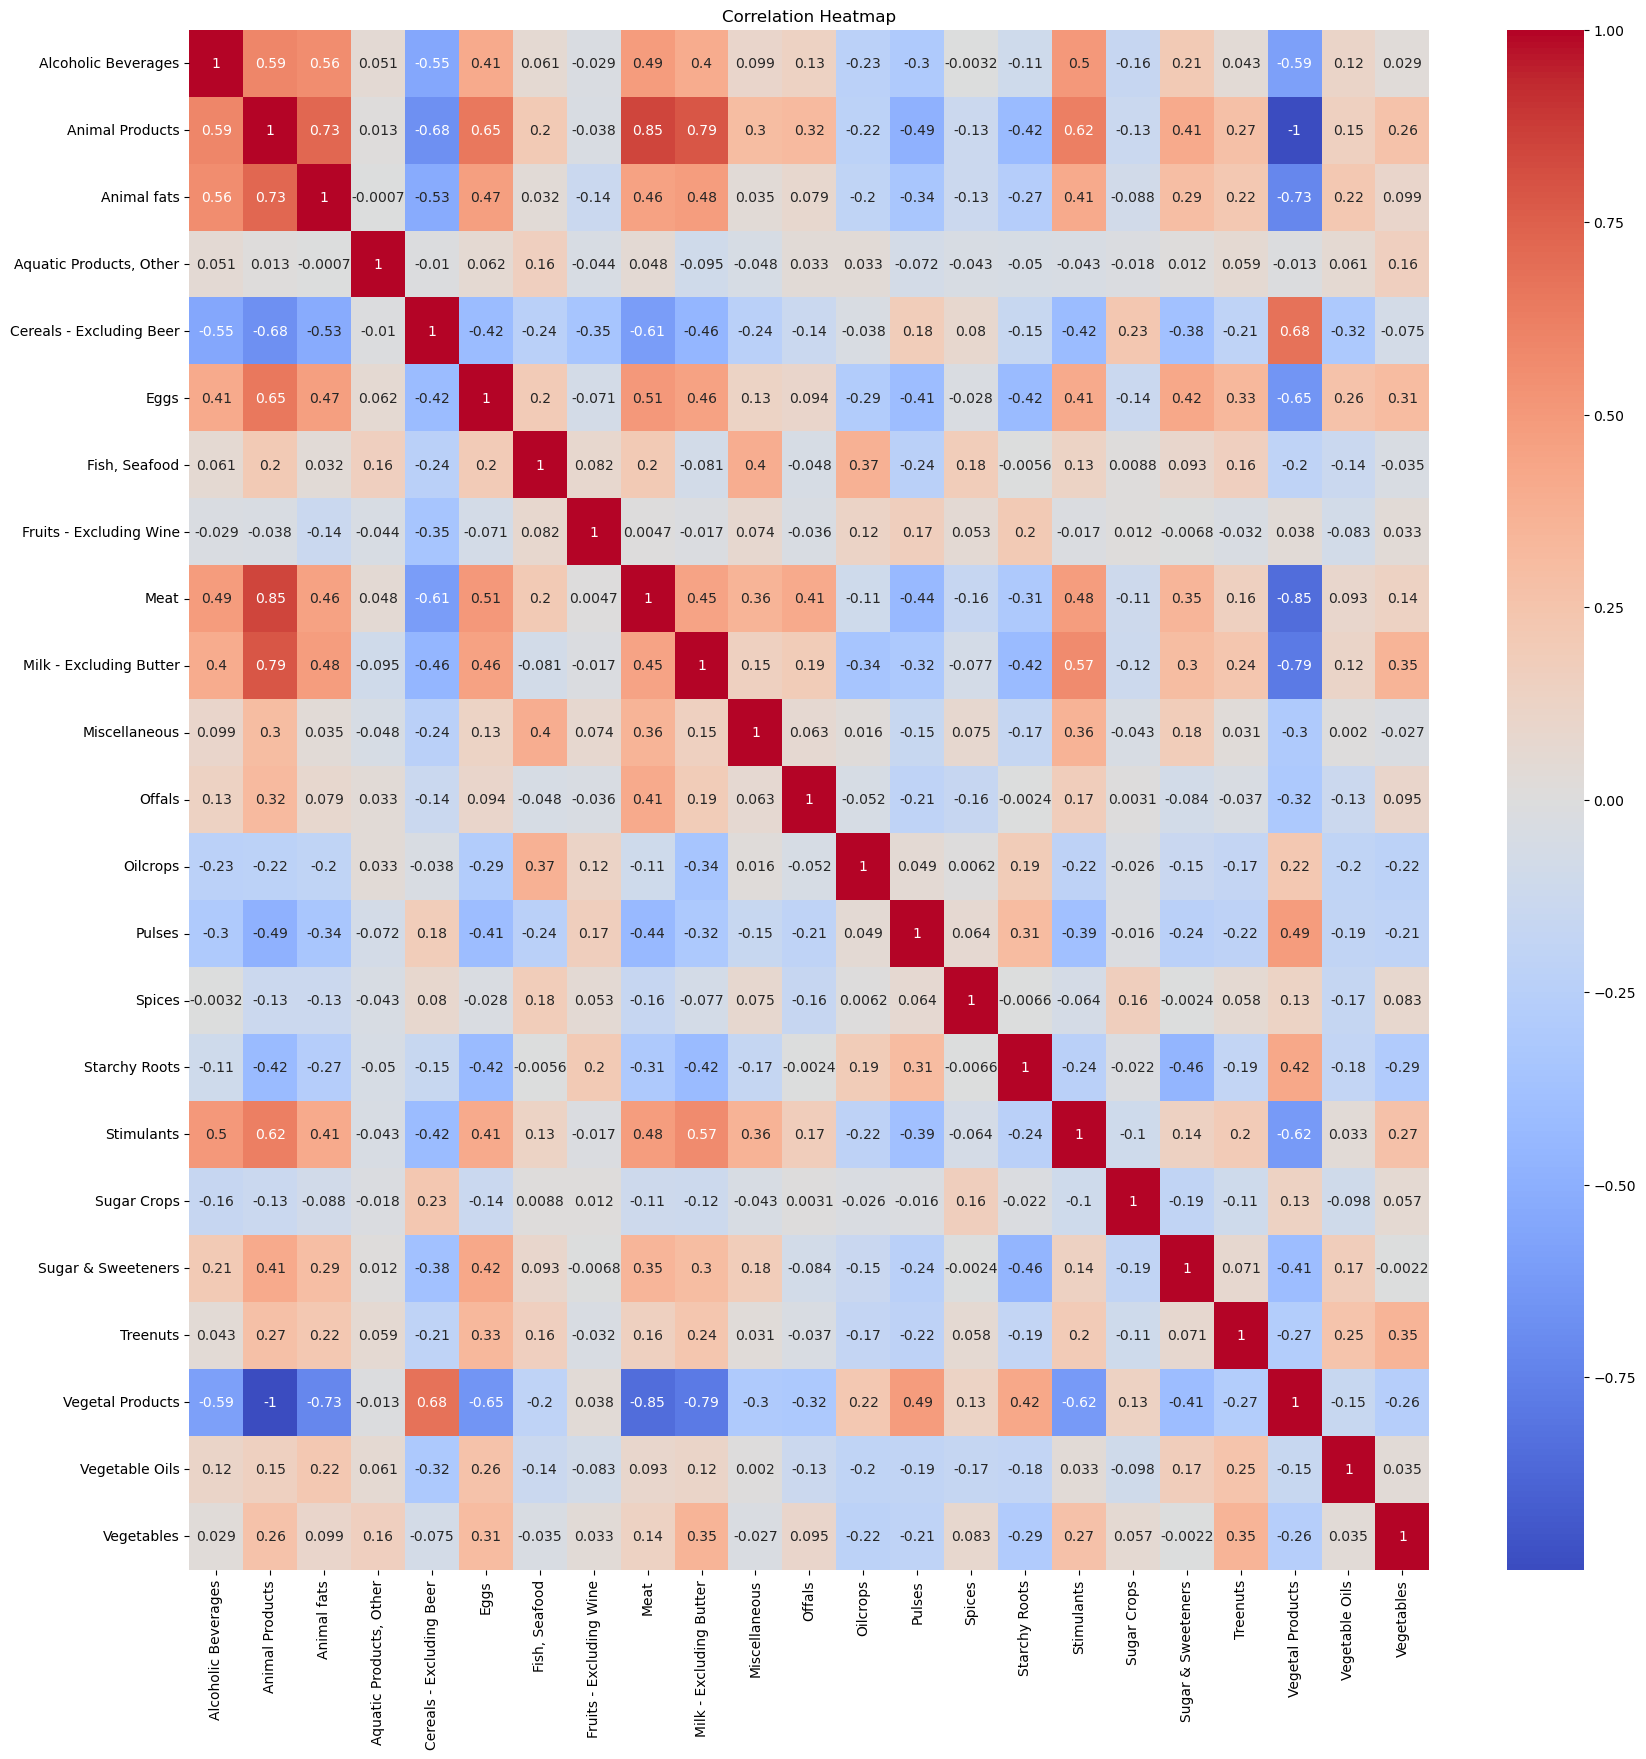

Correlation Coefficient between Deaths and Recovered: 0.6718005807074969


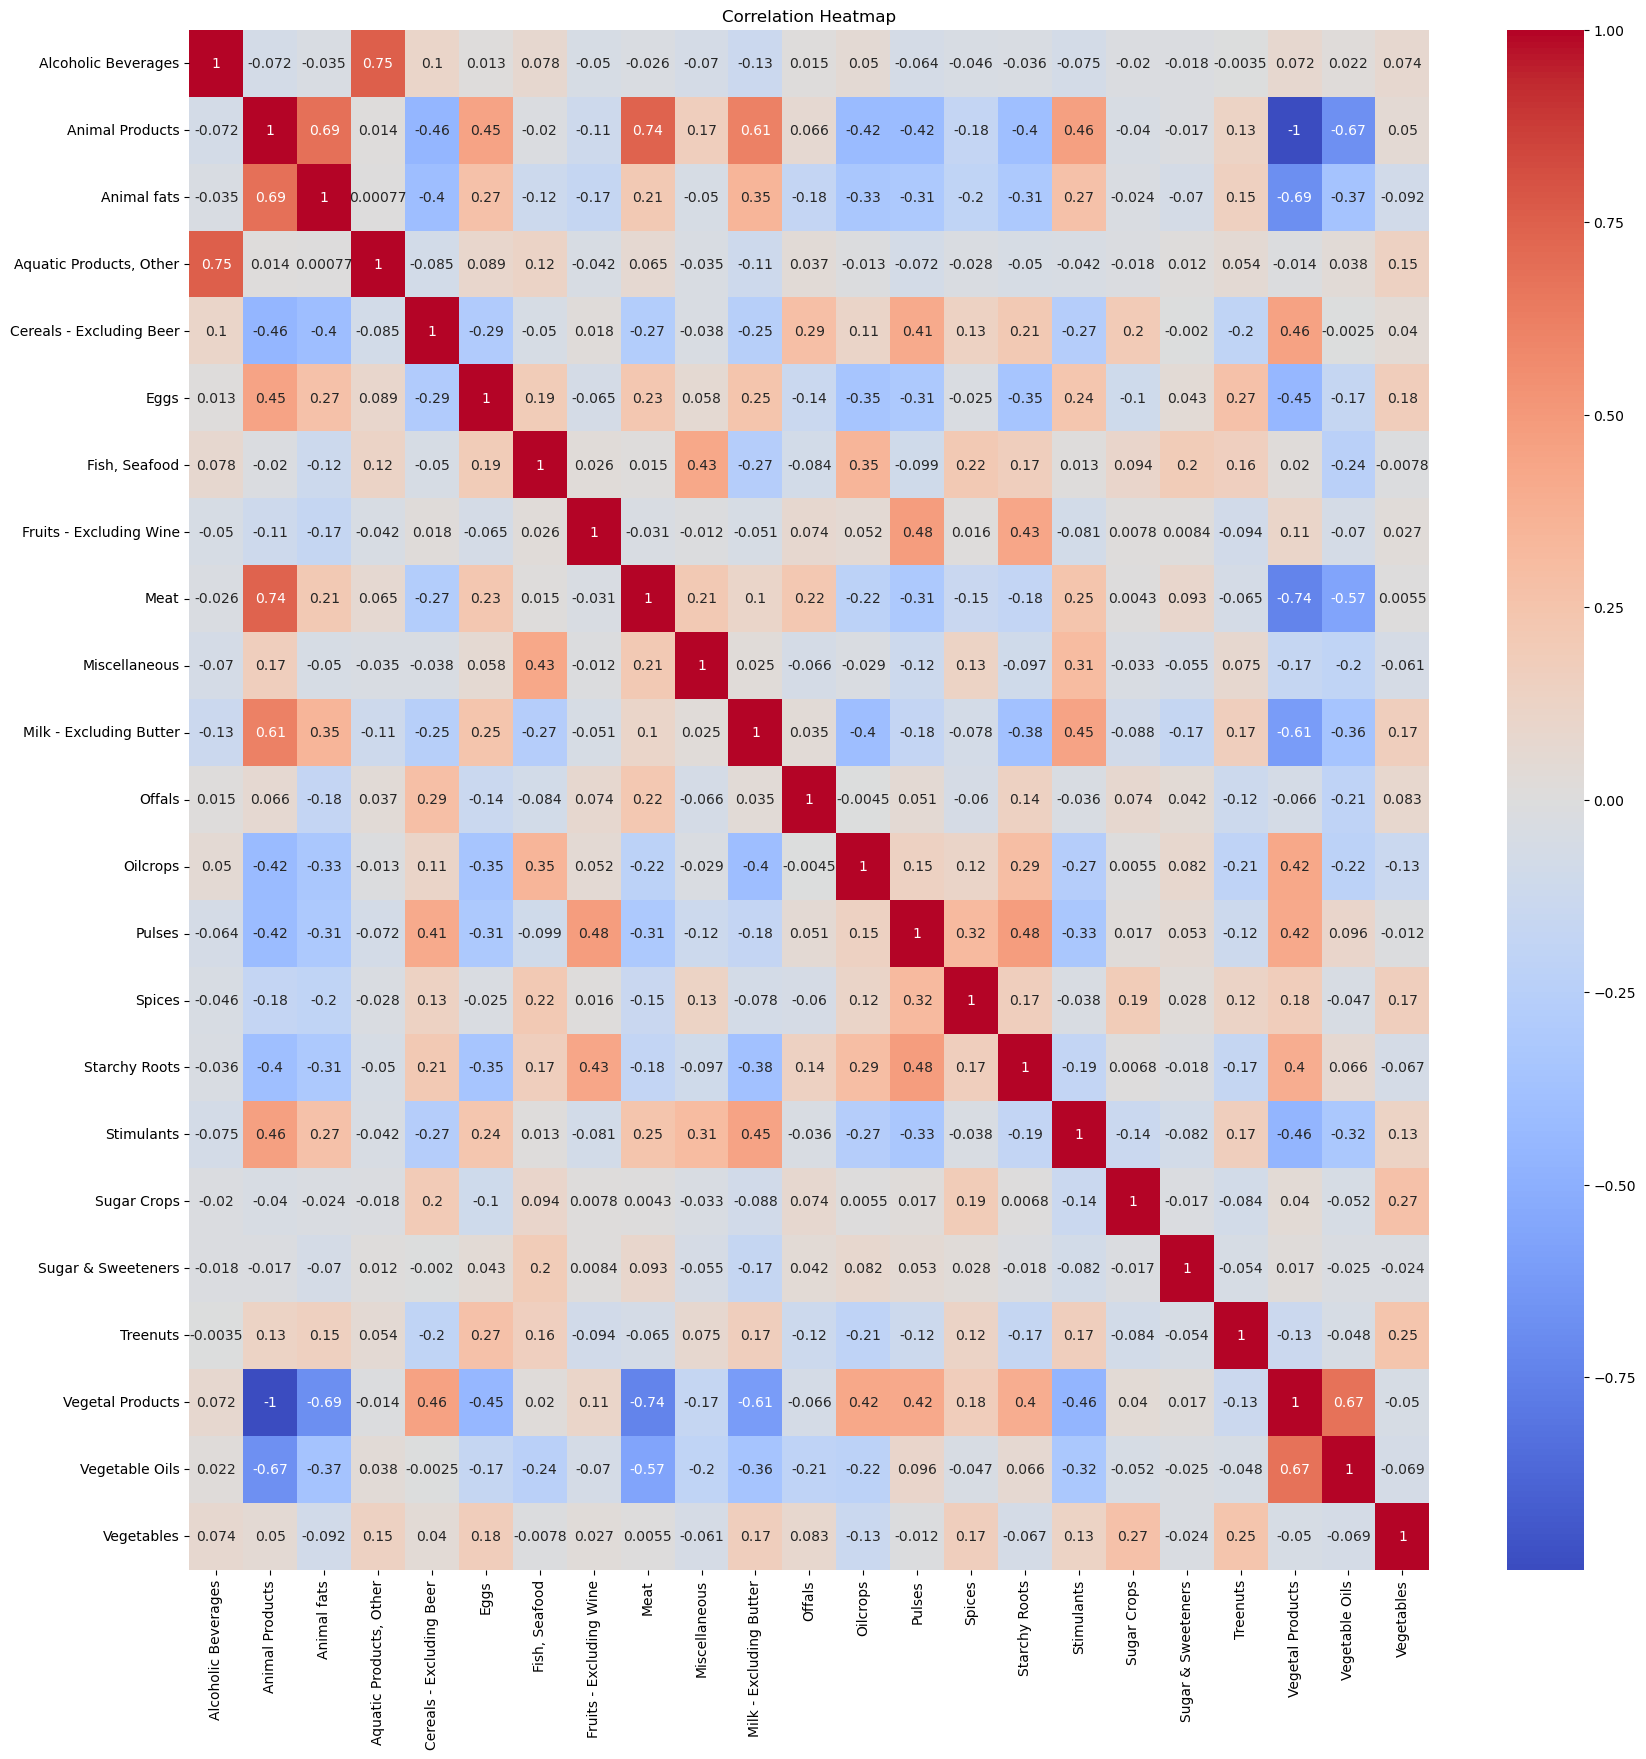

Correlation Coefficient between Deaths and Recovered: 0.6718005807074969


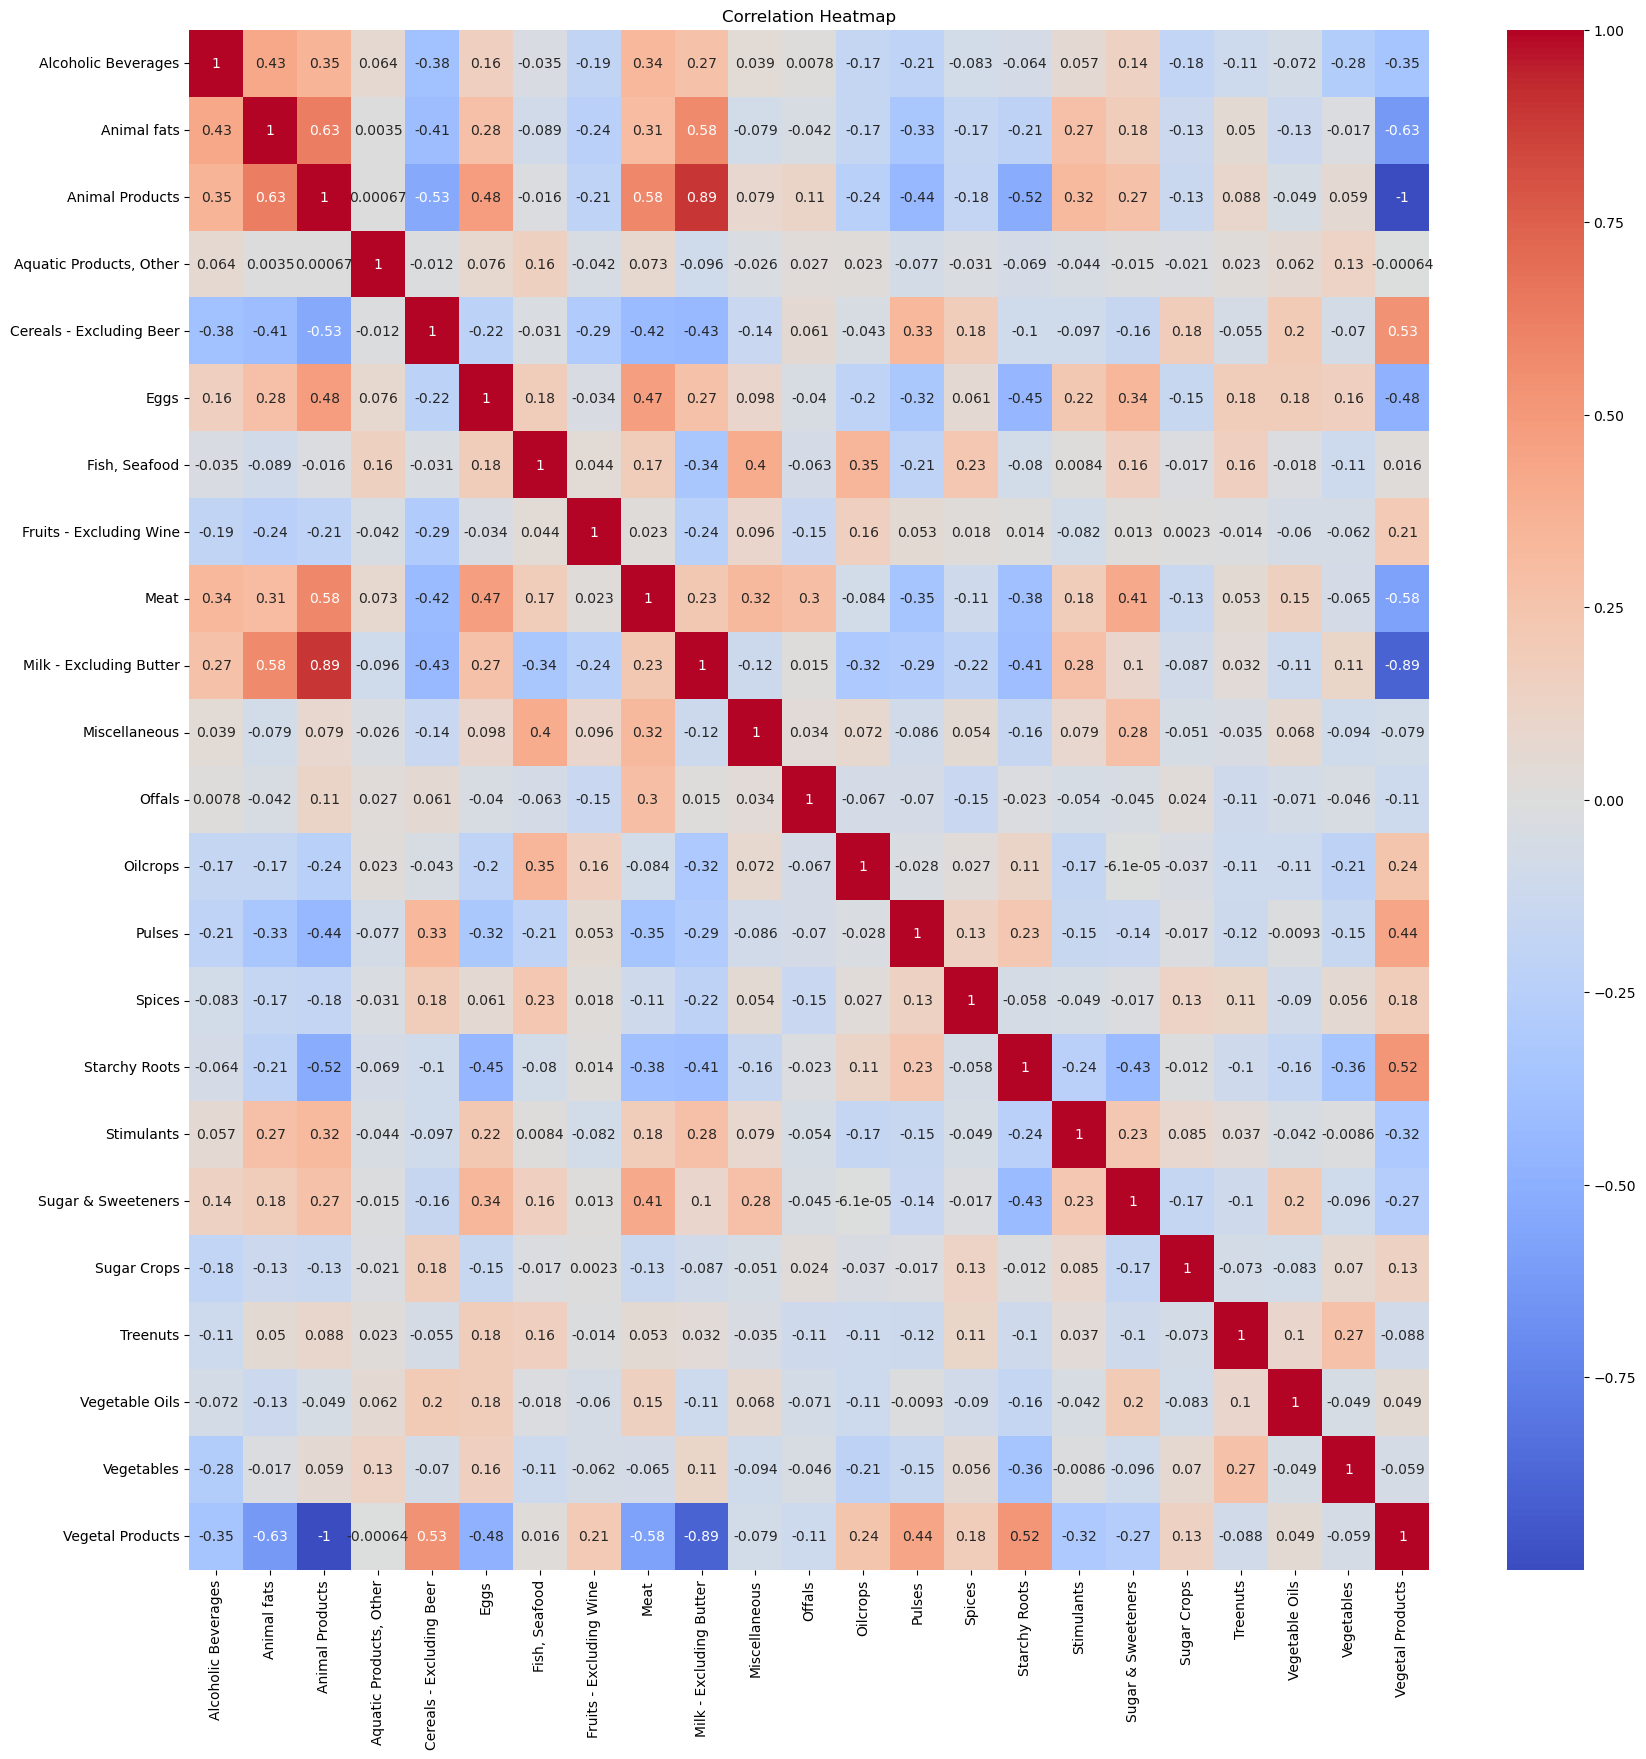

Correlation Coefficient between Deaths and Recovered: 0.6718005807074969


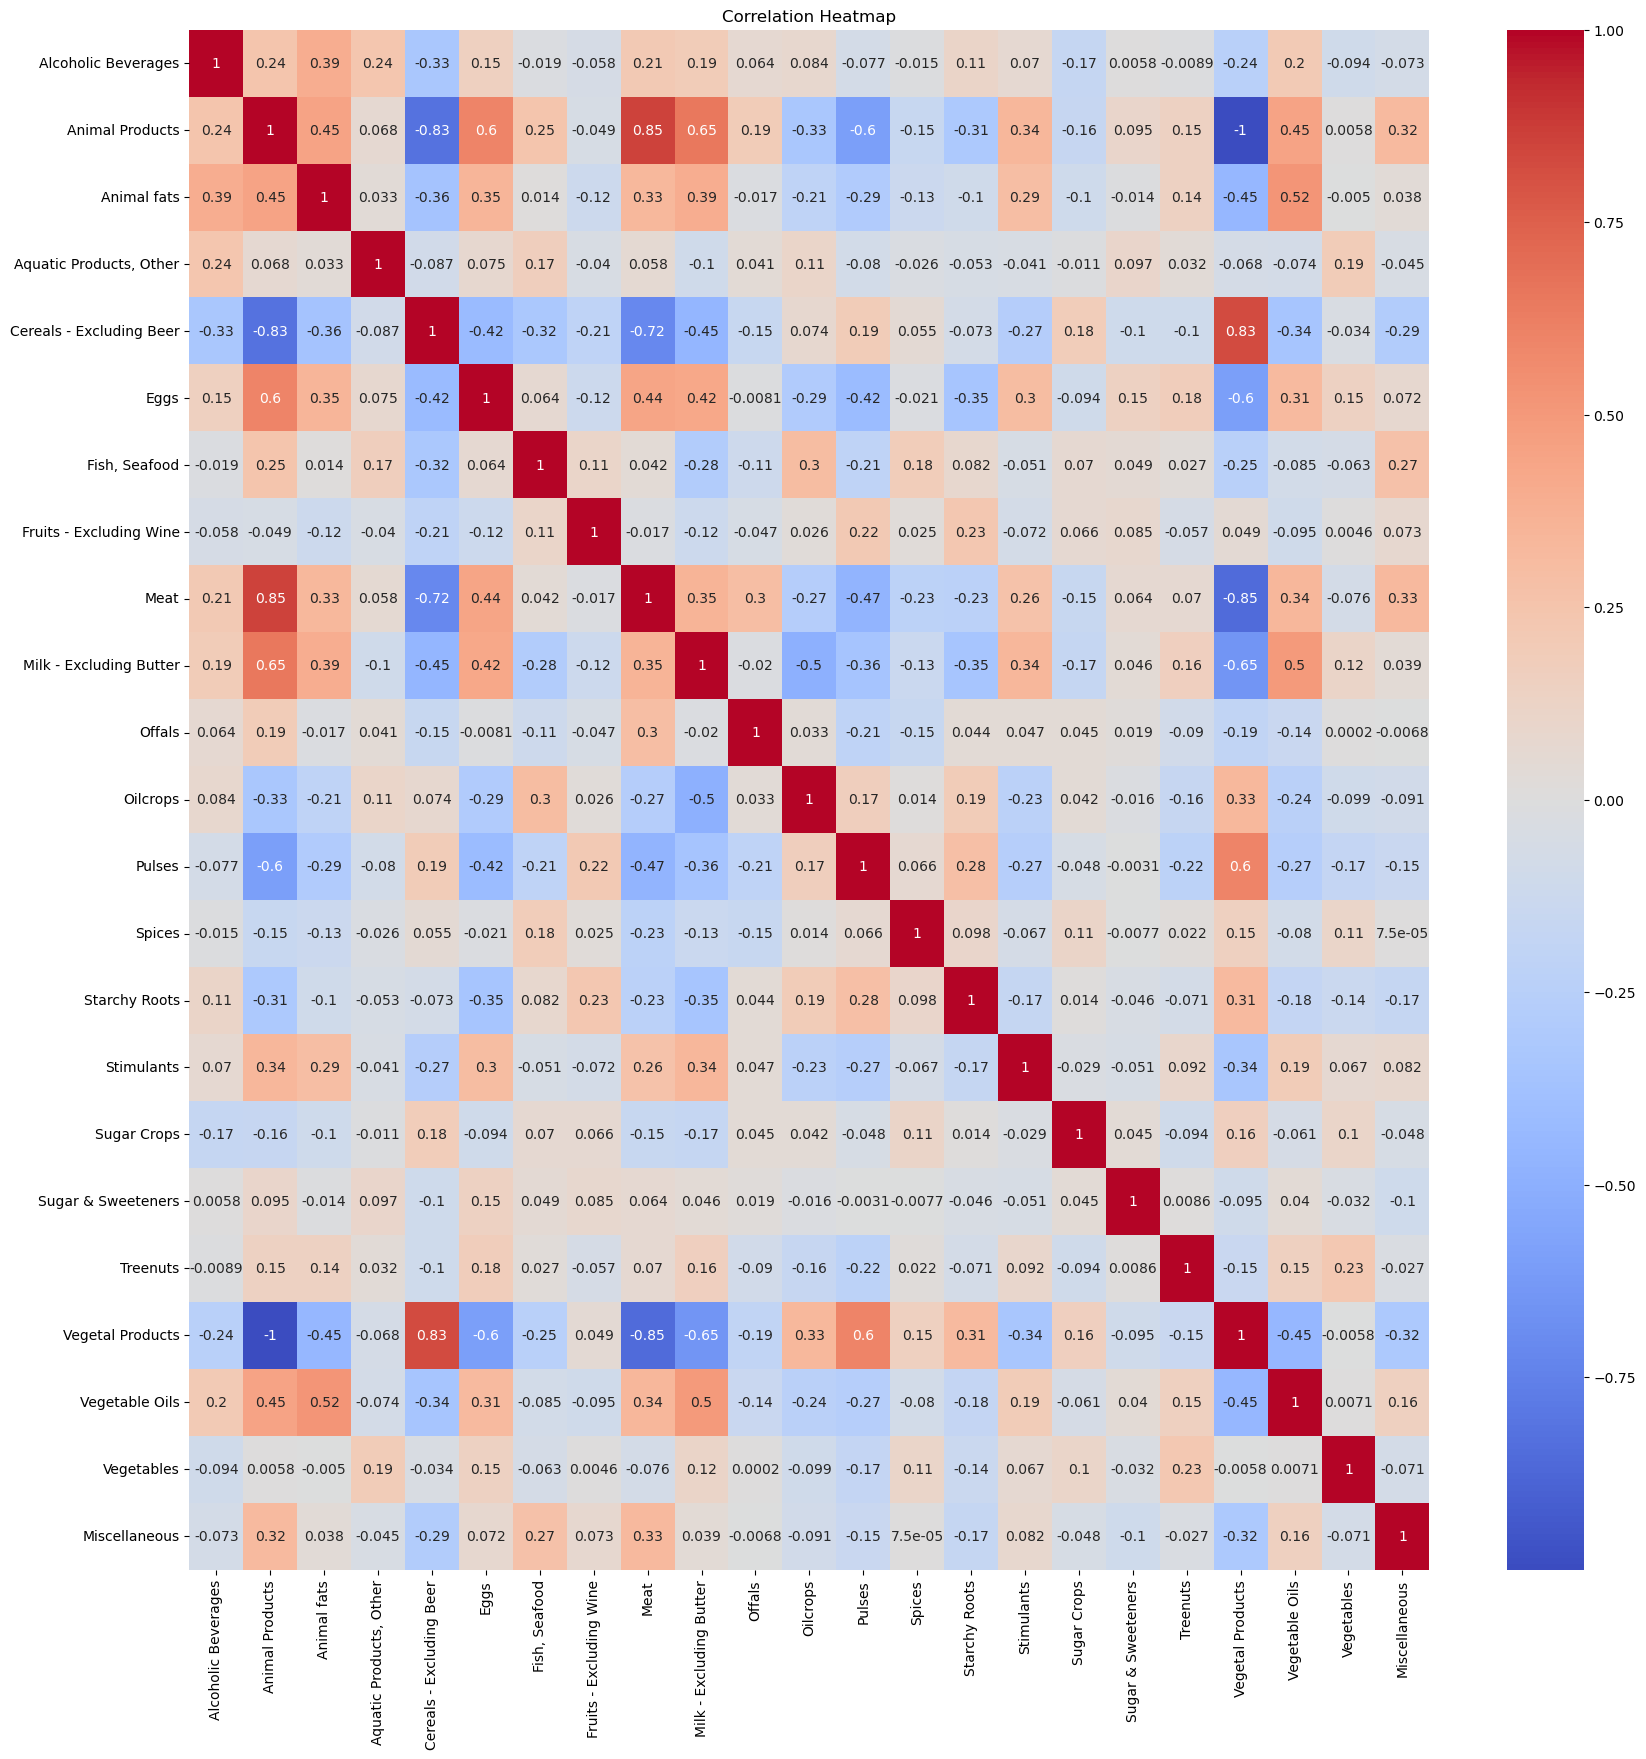

Correlation Coefficient between Deaths and Recovered: 0.6718005807074969


In [10]:
for x in [cal_intake, fat_intake, food_intake, protein_intake]:
    # Correlation matrix with ['Obesity', 'Undernourished', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'Population', 'Unit (all except Population)'] removed
    copied = x.copy()
    correlation_matrix = copied.drop(['Obesity', 'Undernourished', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'Population', 'Unit (all except Population)'], axis = 1).corr()

    # Heatmap
    plt.figure(figsize=(20,20))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
    plt.title('Correlation Heatmap')
    plt.show()

    # Correlation coefficient between 'deaths' and 'recovered'
    correlation_coefficient = copied['Deaths'].corr(copied['Recovered'])
    print("Correlation Coefficient between Deaths and Recovered:", correlation_coefficient)
plt.show()

Animal products and vegetal products are highly negatively correlated so we should remove one (we chose animal products) to avoid mulitcolinearity.

# Merge all dataframes together

In [11]:
#Removed all similar columns ['Obesity', 'Undernourished', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'Population', 'Unit (all except Population)']
cal_copy = cal_intake.copy().drop(['Animal Products', 'Unit (all except Population)'], axis = 1)
fat_copy = fat_intake.copy().drop(['Animal Products', 'Obesity', 'Undernourished', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'Population', 'Unit (all except Population)'], axis = 1)
food_copy = food_intake.copy().drop(['Animal Products', 'Obesity', 'Undernourished', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'Population', 'Unit (all except Population)'], axis = 1)
protein_copy = protein_intake.copy().drop(['Animal Products', 'Obesity', 'Undernourished', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'Population', 'Unit (all except Population)'], axis = 1)

#rename all columns with suffix to differentiate 
cal_copy.columns = cal_copy.columns + '_cal_int'
fat_copy.columns = fat_copy.columns + '_fat_int'
food_copy.columns = food_copy.columns + '_food_int'
protein_copy.columns = protein_copy.columns + '_protein_int'

#merge all dataframe together
merged = pd.merge(cal_copy, fat_copy, left_on = 'Country_cal_int', right_on = 'Country_fat_int', how ='inner').merge(food_copy, left_on = 'Country_cal_int', right_on = 'Country_food_int', how = 'inner').merge(protein_copy, left_on = 'Country_cal_int', right_on = 'Country_protein_int', how = 'inner')
merged = merged.drop(['Country_fat_int','Country_food_int','Country_protein_int'], axis = 1)
merged

Country_cal_int  Alcoholic Beverages_cal_int  \
0                           Afghanistan                       0.0000   
1                               Albania                       0.9120   
2                               Algeria                       0.0896   
3                                Angola                       1.9388   
4                   Antigua and Barbuda                       2.3041   
..                                  ...                          ...   
165  Venezuela (Bolivarian Republic of)                       0.8454   
166                             Vietnam                       0.7150   
167                               Yemen                       0.0000   
168                              Zambia                       1.1925   
169                            Zimbabwe                       1.4269   

     Animal fats_cal_int  Aquatic Products, Other_cal_int  \
0                 0.8504                              0.0   
1                 1.0591                              0.0   
2                 0.1941                              0.0   
3                 0.2644                              0.0   
4                 1.5429                              0.0   
..                   ...                              ...   
165               0.6007                              0.0   
166               0.9363                              0.0   
167               0.3394                              0.0   
168               0.3230                              0.0   
169               0.6904                              0.0   

     Cereals - Excluding Beer_cal_int  Eggs_cal_int  Fish, Seafood_cal_int  \
0                             37.1186        0.1501                 0.0000   
1                             16.2107        0.8091                 0.1471   
2                             25.0112        0.4181                 0.1195   
3                             18.3521        0.0441                 0.8372   
4                             13.7215        0.2057                 1.7280   
..                                ...           ...                    ...   
165                           21.3126        0.2892                 0.4449   
166                           26.9833        0.2894                 1.0385   
167                           32.0727        0.1455                 0.1697   
168                           31.5528        0.1988                 0.5714   
169                           29.8044        0.1381                 0.1611   

     Fruits - Excluding Wine_cal_int  Meat_cal_int  \
0                             1.4757        1.2006   
1                             3.8982        3.8688   
2                             3.1805        1.2543   
3                             2.3133        2.9302   
4                             3.6824        7.0356   
..                               ...           ...   
165                           2.3804        3.1368   
166                           1.8046        7.8311   
167                           1.1879        2.0121   
168                           0.2236        1.5155   
169                           0.4373        1.7491   

     Milk - Excluding Butter_cal_int  ...  Spices_protein_int  \
0                             2.4512  ...              0.1664   
1                             9.9441  ...              0.0000   
2                             3.9869  ...              0.1776   
3                             0.5067  ...              0.0000   
4                             4.6904  ...              0.3438   
..                               ...  ...                 ...   
165                           2.6474  ...              0.0000   
166                           0.5618  ...              0.5221   
167                           0.6545  ...              0.0657   
168                           0.5217  ...              0.0846   
169                           1.0817  ...              0.0488   

     Starchy Roots_protein_int  Stimulants_protein_int  \
0

In [12]:
# Correlation matrix
correlation_matrix = merged.corr()

# Heatmap
plt.figure(figsize=(150, 150))
ax = sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

# Correlation coefficient between 'deaths' and 'recovered'
correlation_coefficient = merged['Deaths_cal_int'].corr(merged['Recovered_cal_int'])
print("Correlation Coefficient between Deaths and Recovered:", correlation_coefficient)

ax.set_xticklabels(ax.get_xticklabels(), fontsize= 50)
ax.set_yticklabels(ax.get_yticklabels(), fontsize= 50)

plt.show()


Correlation Coefficient between Deaths and Recovered: 0.6718005807074969


# Visualize the data

In [13]:
# summarize the number of rows with missing values for each column
missing_col = []
for x in merged.columns:
    n_miss = merged[x].isnull().sum()
    perc = n_miss / merged.shape[0] * 100
    print(f'> {x}, Missing: %d (%.1f%%)' % (n_miss, perc))
    if perc > 0:
        missing_col.append(x)
print(f"\n {missing_col} are all the columns with over 0% missing data")

> Country_cal_int, Missing: 0 (0.0%)
> Alcoholic Beverages_cal_int, Missing: 0 (0.0%)
> Animal fats_cal_int, Missing: 0 (0.0%)
> Aquatic Products, Other_cal_int, Missing: 0 (0.0%)
> Cereals - Excluding Beer_cal_int, Missing: 0 (0.0%)
> Eggs_cal_int, Missing: 0 (0.0%)
> Fish, Seafood_cal_int, Missing: 0 (0.0%)
> Fruits - Excluding Wine_cal_int, Missing: 0 (0.0%)
> Meat_cal_int, Missing: 0 (0.0%)
> Milk - Excluding Butter_cal_int, Missing: 0 (0.0%)
> Miscellaneous_cal_int, Missing: 0 (0.0%)
> Offals_cal_int, Missing: 0 (0.0%)
> Oilcrops_cal_int, Missing: 0 (0.0%)
> Pulses_cal_int, Missing: 0 (0.0%)
> Spices_cal_int, Missing: 0 (0.0%)
> Starchy Roots_cal_int, Missing: 0 (0.0%)
> Stimulants_cal_int, Missing: 0 (0.0%)
> Sugar Crops_cal_int, Missing: 0 (0.0%)
> Sugar & Sweeteners_cal_int, Missing: 0 (0.0%)
> Treenuts_cal_int, Missing: 0 (0.0%)
> Vegetal Products_cal_int, Missing: 0 (0.0%)
> Vegetable Oils_cal_int, Missing: 0 (0.0%)
> Vegetables_cal_int, Missing: 0 (0.0%)
> Obesity_cal_int, M

# Prepare the Data

In [14]:
#Check if any columns are categorical and need to be label encoded 
labels = []

for x in merged.columns:
    print(type(merged[x][0]))
    if merged[x].dtype == 'object':
        labels.append(x)

print(str(len(labels)) + ' columns are categorical:')
print(labels)

<class 'str'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'str'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'nump

Replace '<2.5' with a float.

In [15]:
# must replace <2.5 in undernourished
merged['Undernourished_cal_int'] = merged['Undernourished_cal_int'].replace('<2.5', '2.5').astype(float)
merged_copy = merged.copy()
merged['Undernourished_cal_int'].unique()


array([29.8,  6.2,  3.9, 25. ,  nan,  4.6,  4.3,  2.5, 14.7,  7.5, 10.1,
       17.1, 26.4,  3.6, 20. , 12.6, 16.4,  9.9, 59.6, 37.5,  2.7,  8.5,
        4.8, 40.3, 19. ,  5.6, 18.9,  9.5,  7.9,  4.5,  9. ,  2.9, 20.6,
        3.7,  4.2, 10.5, 10.2,  5.5, 15.2, 16.5, 28. ,  8.1, 49.3, 12.9,
       14.5,  8.3,  4.9, 29. ,  8. , 12.2, 29.4, 47.8,  2.8,  7.1, 11. ,
       13.1, 37.2, 44.4, 17.5, 10.3,  6.3, 10.4,  6.5, 13.4,  3.4, 27.9,
       10.6, 27.3,  8.7, 17. ,  3.2,  6.8, 20.3, 10. , 10.7,  9.7, 13.3,
       36.8,  5.7,  7. , 11.3, 25.6,  8.9, 20.1,  3.5,  7.8, 24.9, 16.1,
        5.4, 41. ,  2.6, 30.7,  7.2, 21.2,  9.3, 38.9, 46.7, 51.3])

In [16]:
#Check if any columns are categorical and need to be label encoded 
labels = []

for x in merged.columns:
    print(type(merged[x][0]))
    if merged[x].dtype == 'object':
        labels.append(x)

print(str(len(labels)) + ' columns are categorical:')
print(labels)

<class 'str'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<c

# KNN Imputer

In [17]:
# Create an imputer object with a specific number of neighbors
imputer = KNNImputer(n_neighbors = 5)  

# Fit and transform the data
# Remove Indentifier (Country)
pre_X = merged.drop(['Country_cal_int'], axis = 1)


In [18]:
filled_data = imputer.fit_transform(pre_X)
filled_df = pd.DataFrame(filled_data, columns = pre_X.columns)

# Convert back to DataFrame 
filled_df

Alcoholic Beverages_cal_int  Animal fats_cal_int  \
0                         0.0000               0.8504   
1                         0.9120               1.0591   
2                         0.0896               0.1941   
3                         1.9388               0.2644   
4                         2.3041               1.5429   
..                           ...                  ...   
165                       0.8454               0.6007   
166                       0.7150               0.9363   
167                       0.0000               0.3394   
168                       1.1925               0.3230   
169                       1.4269               0.6904   

     Aquatic Products, Other_cal_int  Cereals - Excluding Beer_cal_int  \
0                                0.0                           37.1186   
1                                0.0                           16.2107   
2                                0.0                           25.0112   
3                                0.0                           18.3521   
4                                0.0                           13.7215   
..                               ...                               ...   
165                              0.0                           21.3126   
166                              0.0                           26.9833   
167                              0.0                           32.0727   
168                              0.0                           31.5528   
169                              0.0                           29.8044   

     Eggs_cal_int  Fish, Seafood_cal_int  Fruits - Excluding Wine_cal_int  \
0          0.1501                 0.0000                           1.4757   
1          0.8091                 0.1471                           3.8982   
2          0.4181                 0.1195                           3.1805   
3          0.0441                 0.8372                           2.3133   
4          0.2057                 1.7280                           3.6824   
..            ...                    ...                              ...   
165        0.2892                 0.4449                           2.3804   
166        0.2894                 1.0385                           1.8046   
167        0.1455                 0.1697                           1.1879   
168        0.1988                 0.5714                           0.2236   
169        0.1381                 0.1611                           0.4373   

     Meat_cal_int  Milk - Excluding Butter_cal_int  Miscellaneous_cal_int  \
0          1.2006                           2.4512                 0.0250   
1          3.8688                           9.9441                 0.0588   
2          1.2543                           3.9869                 0.1045   
3          2.9302                           0.5067                 0.0661   
4          7.0356                           4.6904                 0.3086   
..            ...                              ...                    ...   
165        3.1368                           2.6474                 0.0222   
166        7.8311                           0.5618                 0.0340   
167        2.0121                           0.6545                 0.0485   
168        1.5155                           0.5217                 0.0497   
169        1.7491                           1.0817                 0.0460   

     ...  Spices_protein_int  Starchy Roots_protein_int  \
0    ...              0.1664                     0.1941   
1    ...              0.0000                     0.8867   
2    ...              0.1776                     1.4638   
3    ...              0.0000                     5.1941   
4    ...              0.3438                     0.4666   
..   ...                 ...                        ...   
165  ...              0.0000                     1.1195   
166  ...              0.5221                     0.2333   
167  ...              0.0657                     0

In [19]:
# summarize the number of rows with missing values for each column
missing_col = []
for x in filled_df.columns:
    n_miss = filled_df[x].isnull().sum()
    perc = n_miss / filled_df.shape[0] * 100
    print(f'> {x}, Missing: %d (%.1f%%)' % (n_miss, perc))
    if perc > 0:
        missing_col.append(x)
print(f"\n {missing_col} are all the columns with over 0% missing data")

> Alcoholic Beverages_cal_int, Missing: 0 (0.0%)
> Animal fats_cal_int, Missing: 0 (0.0%)
> Aquatic Products, Other_cal_int, Missing: 0 (0.0%)
> Cereals - Excluding Beer_cal_int, Missing: 0 (0.0%)
> Eggs_cal_int, Missing: 0 (0.0%)
> Fish, Seafood_cal_int, Missing: 0 (0.0%)
> Fruits - Excluding Wine_cal_int, Missing: 0 (0.0%)
> Meat_cal_int, Missing: 0 (0.0%)
> Milk - Excluding Butter_cal_int, Missing: 0 (0.0%)
> Miscellaneous_cal_int, Missing: 0 (0.0%)
> Offals_cal_int, Missing: 0 (0.0%)
> Oilcrops_cal_int, Missing: 0 (0.0%)
> Pulses_cal_int, Missing: 0 (0.0%)
> Spices_cal_int, Missing: 0 (0.0%)
> Starchy Roots_cal_int, Missing: 0 (0.0%)
> Stimulants_cal_int, Missing: 0 (0.0%)
> Sugar Crops_cal_int, Missing: 0 (0.0%)
> Sugar & Sweeteners_cal_int, Missing: 0 (0.0%)
> Treenuts_cal_int, Missing: 0 (0.0%)
> Vegetal Products_cal_int, Missing: 0 (0.0%)
> Vegetable Oils_cal_int, Missing: 0 (0.0%)
> Vegetables_cal_int, Missing: 0 (0.0%)
> Obesity_cal_int, Missing: 0 (0.0%)
> Undernourished_cal

# Normalize the data after filling in missing values

In [20]:
X = filled_df.drop(['Confirmed_cal_int', 'Deaths_cal_int', 'Recovered_cal_int', 'Active_cal_int'], axis = 1)
Y = filled_df['Deaths_cal_int']

In [21]:
scaler = StandardScaler()
normalized_data = scaler.fit_transform(X)  

In [22]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(normalized_data, Y, test_size = 0.2, random_state = 42)

# OLS Regression


In [23]:
ols = sm.OLS(y_train, X_train).fit()

In [24]:
y_pred = ols.predict(X_test)
y_pred

array([-0.13330016, -2.26105872,  0.08938396,  0.08116071,  0.1082339 ,
        0.01132269, -0.07725742,  0.10441537,  0.16467852,  0.01697756,
        0.09944677, -0.03067457,  0.06987141,  0.03625946,  0.21411675,
       -0.18149687, -0.189805  , -0.0028016 , -2.03255259,  0.05738814,
        0.10247797,  0.00340568,  0.4728673 ,  0.04176336, -0.04020332,
        0.03971434, -1.42589823, -0.01295872, -1.08784492,  0.17235277,
        0.10783295,  0.09392084, -0.0780703 ,  0.08063115])

In [25]:
# Calculate R^2 (coefficient of determination)
r2 = r2_score(y_test, y_pred)
print("R^2 score:", r2)

R_squared = r2  # Example R^2 value
n = len(y_test)  # Number of data points
TSS = np.sum((y_test - np.mean(y_test))**2)  # Total sum of squares

# Calculate MSE from R^2
MSE = (1 - R_squared) * TSS / n
print("Mean Squared Error (MSE):", MSE)

# Approximate MAE 
MAE = 0.8 * np.sqrt(MSE)
print("Approximate Mean Absolute Error (MAE):", MAE)

# Mean Error 
mean_error = np.mean(np.array(y_test) - np.array(y_pred))
print("Mean Error:", mean_error)

R^2 score: -228.97710703091906
Mean Squared Error (MSE): 0.3786606900254559
Approximate Mean Absolute Error (MAE): 0.49228329406581717
Mean Error: 0.1921495500706735


# Multiple Linear Regression


Feature: 0 Alcoholic Beverages_cal_int, Score: -0.03894
Feature: 1 Animal fats_cal_int, Score: 0.41804
Feature: 2 Aquatic Products, Other_cal_int, Score: 0.19711
Feature: 3 Cereals - Excluding Beer_cal_int, Score: -0.14964
Feature: 4 Eggs_cal_int, Score: 0.10450
Feature: 5 Fish, Seafood_cal_int, Score: 0.17500
Feature: 6 Fruits - Excluding Wine_cal_int, Score: -0.00279
Feature: 7 Meat_cal_int, Score: 0.84885
Feature: 8 Milk - Excluding Butter_cal_int, Score: 0.69532
Feature: 9 Miscellaneous_cal_int, Score: -0.07858
Feature: 10 Offals_cal_int, Score: -0.02336
Feature: 11 Oilcrops_cal_int, Score: -0.01845
Feature: 12 Pulses_cal_int, Score: 0.07300
Feature: 13 Spices_cal_int, Score: -0.00148
Feature: 14 Starchy Roots_cal_int, Score: -0.11039
Feature: 15 Stimulants_cal_int, Score: -0.04747
Feature: 16 Sugar Crops_cal_int, Score: 0.12209
Feature: 17 Sugar & Sweeteners_cal_int, Score: -0.03339
Feature: 18 Treenuts_cal_int, Score: -0.03473
Feature: 19 Vegetal Products_cal_int, Score: 1.75639


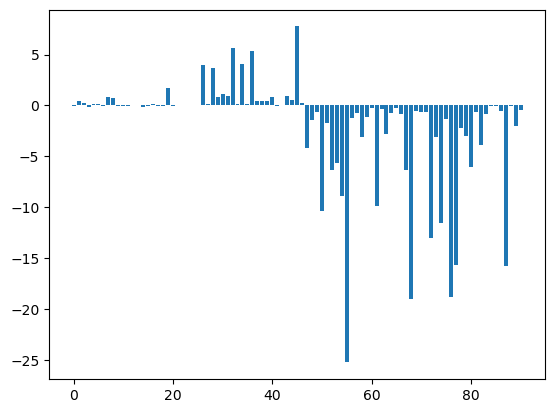

In [26]:
lin_model = linear_model.LinearRegression()

lin_model.fit(X_train, y_train)

importance = lin_model.coef_


for i,v in enumerate(importance):
    print(f'Feature: %0d {filled_df.columns[i]}, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()


In [27]:
# Evaluate the model
print("Intercept (β0):", lin_model.intercept_)
print("Coefficients (β1, β2, ...):", lin_model.coef_)

Intercept (β0): 0.05404622706589582
Coefficients (β1, β2, ...): [-3.89404224e-02  4.18035810e-01  1.97111629e-01 -1.49641247e-01
  1.04495759e-01  1.75003877e-01 -2.79243628e-03  8.48851887e-01
  6.95316217e-01 -7.85764390e-02 -2.33619086e-02 -1.84497338e-02
  7.30019282e-02 -1.48159173e-03 -1.10390062e-01 -4.74694580e-02
  1.22086465e-01 -3.33904871e-02 -3.47340593e-02  1.75638855e+00
 -2.97555711e-02  1.12292610e-02  2.92432967e-03  4.59543123e-03
  8.55955157e-03  1.16067193e-02  4.02106725e+00  1.61453645e-01
  3.64793131e+00  8.05363658e-01  1.11179155e+00  9.54320480e-01
  5.62595711e+00  1.06756939e-01  4.02749713e+00  1.39838707e-01
  5.32023121e+00  4.54002488e-01  4.87574420e-01  4.27535348e-01
  8.57673114e-01 -8.30336041e-03  3.96917757e-03  9.25063460e-01
  5.56783673e-01  7.75555988e+00  2.29104473e-01 -4.21843758e+00
 -1.38670590e+00 -6.07459217e-01 -1.03756174e+01 -1.70257681e+00
 -6.30814977e+00 -5.60800548e+00 -8.90797805e+00 -2.52313316e+01
 -1.21719712e+00 -7.740324

In [28]:
y_pred = lin_model.predict(X_test)
y_pred

array([-0.13330016,  0.40136833,  0.08938396,  0.08116071,  0.1082339 ,
        0.01132269, -0.07725742,  0.10441537,  0.16467852,  0.01697756,
        0.09944677, -0.03067457,  0.06987141,  0.03625946,  0.21411675,
       -0.18149687, -0.189805  , -0.0028016 ,  0.25134845,  0.05738814,
        0.10247797,  0.00340568,  0.4728673 ,  0.04176336, -0.04020332,
        0.03971434,  1.48887949, -0.01295872,  0.23890786,  0.17235277,
        0.10783295,  0.09392084, -0.0780703 ,  0.08063115])

In [29]:
# Calculate R^2 (coefficient of determination)
r2 = r2_score(y_test, y_pred)
print("R^2 score:", r2)

R_squared = r2  # Example R^2 value
n = len(y_test)  # Number of data points
TSS = np.sum((y_test - np.mean(y_test))**2)  # Total sum of squares

# Calculate MSE from R^2
MSE = (1 - R_squared) * TSS / n
print("Mean Squared Error (MSE):", MSE)

# Approximate MAE 
MAE = 0.8 * np.sqrt(MSE)
print("Approximate Mean Absolute Error (MAE):", MAE)

# Mean Error 
mean_error = np.mean(np.array(y_test) - np.array(y_pred))
print("Mean Error:", mean_error)

R^2 score: -49.417673751494775
Mean Squared Error (MSE): 0.08301344154943488
Approximate Mean Absolute Error (MAE): 0.23049642641836843
Mean Error: -0.07808158525879574


# KNN Regression


In [30]:
# Define and fit the model to the training data 
knn = KNeighborsRegressor(n_neighbors = 5) 
knn.fit(X_train, y_train)


KNeighborsRegressor()

In [31]:
y_pred = knn.predict(X_test) 

In [32]:
r2 = r2_score(y_test, y_pred)
print("R^2 score:", r2 )

R_squared = r2  # Example R^2 value
n = len(y_test)  # Number of data points
TSS = np.sum((y_test - np.mean(y_test))**2)  # Total sum of squares

# Calculate MSE from R^2
MSE = (1 - R_squared) * TSS / n
print("Mean Squared Error (MSE):", MSE)

# Approximate MAE 
MAE = 0.8 * np.sqrt(MSE)
print("Approximate Mean Absolute Error (MAE):", MAE)

# Mean Error 
mean_error = np.mean(np.array(y_test) - np.array(y_pred))
print("Mean Error:", mean_error)

R^2 score: 0.4453643268994034
Mean Squared Error (MSE): 0.0009132157952607402
Approximate Mean Absolute Error (MAE): 0.02417556843110155
Mean Error: -0.011957631368430319


# Random Forest with RFECV

In [33]:
# Initialize RandomForestRegressor
model = RandomForestRegressor(random_state= 42)

# 10-fold cross validation
rfecv = RFECV(estimator=model, step=1, cv=10, scoring = 'r2')
rfecv.fit(X_train, y_train)

print(f"Optimal number of features: {rfecv.n_features_}")
print("Selected Features:", rfecv.support_)





Optimal number of features: 32
Selected Features: [ True  True False False  True False False False  True False  True  True
  True False False False False False False False  True False  True False
 False False  True False  True  True False False  True False  True False
 False False False  True False False False False  True False False  True
  True False False  True  True False False  True  True False  True False
 False False False  True False False False  True False  True False False
 False  True False False False  True  True False False False False False
 False False  True False  True False  True]


In [34]:
# Apply RFE
rfe = RFE(estimator=model, n_features_to_select= 32)
X_rfe = rfe.fit(X_train, y_train)

# Transform both training and test sets
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# Train the RandomForestRegressor on the selected features
model.fit(X_train_rfe, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_rfe)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Display feature selection results
print("Selected Features (True means selected):", rfe.support_)
print("Feature Rankings:", rfe.ranking_)


Mean Squared Error: 0.0010966107772282557
Selected Features (True means selected): [ True  True False False  True False False False  True False  True  True
  True False False False False False False False  True False  True False
 False False  True False  True  True False False  True False  True False
 False False False  True False False False False  True False False  True
  True False False  True  True False False  True  True False  True False
 False False False  True False False False  True False  True False False
 False  True False False False  True  True False False False False False
 False False  True False  True False  True]
Feature Rankings: [ 1  1 59 43  1 49 40 50  1 21  1  1  1 36 41 18 53 10  9  3  1 25  1  2
 22 58  1 60  1  1  7 34  1 16  1 17 24 39 13  1  6 54 55 23  1 11 48  1
  1 38 31  1  1 47 44  1  1 33  1 19 28  4 12  1 56 35 30  1 14  1  5 52
 29  1 46  8 20  1  1 32 45 51 26 15 57 27  1 42  1 37  1]


In [35]:
r2 = r2_score(y_test, y_pred)
print("R^2 score:", r2 )

R_squared = r2  # Example R^2 value
n = len(y_test)  # Number of data points
TSS = np.sum((y_test - np.mean(y_test))**2)  # Total sum of squares

# Calculate MSE from R^2
MSE = (1 - R_squared) * TSS / n
print("Mean Squared Error (MSE):", MSE)

# Approximate MAE 
MAE = 0.8 * np.sqrt(MSE)
print("Approximate Mean Absolute Error (MAE):", MAE)

# Mean Error 
mean_error = np.mean(np.array(y_test) - np.array(y_pred))
print("Mean Error:", mean_error)

R^2 score: 0.33398057752198207
Mean Squared Error (MSE): 0.0010966107772282557
Approximate Mean Absolute Error (MAE): 0.026492091224100896
Mean Error: -0.005174702250455016


# Regresion without RFECV

In [36]:
# Initialize RandomForestRegressor
model = RandomForestRegressor(random_state=42)

# Apply RFE
rfe = RFE(estimator=model, n_features_to_select= 82)
X_rfe = rfe.fit(X_train, y_train)

# Transform both training and test sets
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# Train the RandomForestRegressor on the selected features
model.fit(X_train_rfe, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_rfe)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Display feature selection results
print("Selected Features (True means selected):", rfe.support_)
print("Feature Rankings:", rfe.ranking_)




Mean Squared Error: 0.0011273901058126575
Selected Features (True means selected): [ True  True False  True  True  True  True  True  True  True  True  True
  True  True  True  True False  True  True  True  True  True  True  True
  True False  True False  True  True  True  True  True  True  True  True
  True  True  True  True  True False False  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False  True  True  True  True  True  True False
  True  True  True  True  True  True  True  True  True  True  True  True
 False  True  True  True  True  True  True]
Feature Rankings: [ 1  1  9  1  1  1  1  1  1  1  1  1  1  1  1  1  3  1  1  1  1  1  1  1
  1  8  1 10  1  1  1  1  1  1  1  1  1  1  1  1  1  4  5  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  6  1  1  1  1  1  1  2
  1  1  1  1  1  1  1  1  1  1  1  1  7  1  1  1  1  1  1]


In [37]:
r2 = r2_score(y_test, y_pred)
print("R^2 score:", r2 )

R_squared = r2  # Example R^2 value
n = len(y_test)  # Number of data points
TSS = np.sum((y_test - np.mean(y_test))**2)  # Total sum of squares

# Calculate MSE from R^2
MSE = (1 - R_squared) * TSS / n
print("Mean Squared Error (MSE):", MSE)

# Approximate MAE 
MAE = 0.8 * np.sqrt(MSE)
print("Approximate Mean Absolute Error (MAE):", MAE)

# Mean Error 
mean_error = np.mean(np.array(y_test) - np.array(y_pred))
print("Mean Error:", mean_error)

R^2 score: 0.3152869525150691
Mean Squared Error (MSE): 0.0011273901058126575
Approximate Mean Absolute Error (MAE): 0.026861304281812173
Mean Error: -0.0071461337951813884



# SVM Model for Regression

In [38]:
# Create an SVR model
svr_model = SVR(kernel='rbf')  

# Train the model
svr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.005123653233923776


In [39]:
r2 = r2_score(y_test, y_pred)
print("R^2 score:", r2 )

R_squared = r2  # Example R^2 value
n = len(y_test)  # Number of data points
TSS = np.sum((y_test - np.mean(y_test))**2)  # Total sum of squares

# Calculate MSE from R^2
MSE = (1 - R_squared) * TSS / n
print("Mean Squared Error (MSE):", MSE)

# Approximate MAE 
MAE = 0.8 * np.sqrt(MSE)
print("Approximate Mean Absolute Error (MAE):", MAE)

# Mean Error 
mean_error = np.mean(np.array(y_test) - np.array(y_pred))
print("Mean Error:", mean_error)

R^2 score: -2.111817464041986
Mean Squared Error (MSE): 0.005123653233923776
Approximate Mean Absolute Error (MAE): 0.05726375878084862
Mean Error: -0.058967266533761054


# XGBoost

In [40]:
# Create XGBoost model
model = xgb.XGBRegressor(
    max_depth=3,  # Adjust maximum depth to control model complexity
    learning_rate=0.1,  # Learning rate
    n_estimators=100,  # Number of trees
    objective='reg:squarederror'  # For regression problems
)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.0009378739155637516


In [41]:
r2 = r2_score(y_test, y_pred)
print("R^2 score:", r2 )

R_squared = r2  # Example R^2 value
n = len(y_test)  # Number of data points
TSS = np.sum((y_test - np.mean(y_test))**2)  # Total sum of squares

# Calculate MSE from R^2
MSE = (1 - R_squared) * TSS / n
print("Mean Squared Error (MSE):", MSE)

# Approximate MAE 
MAE = 0.8 * np.sqrt(MSE)
print("Approximate Mean Absolute Error (MAE):", MAE)

# Mean Error 
mean_error = np.mean(np.array(y_test) - np.array(y_pred))
print("Mean Error:", mean_error)

R^2 score: 0.4303883779258626
Mean Squared Error (MSE): 0.0009378739155637516
Approximate Mean Absolute Error (MAE): 0.02449978175332999
Mean Error: -0.009874569941778901


In [42]:
dtrain = xgb.DMatrix(X_train, label=y_train, missing=np.nan, enable_categorical=True)  
dtest = xgb.DMatrix(X_test, label=y_test, missing=np.nan, enable_categorical=True)

# Set up XGBoost parameters (you can tune these parameters)
params = {
    'objective': 'reg:squarederror',  # For regression tasks
    'max_depth': 5,                   # Depth of trees
    'eta': 0.1,                       # Learning rate
    'subsample': 0.8,                 # Subsample ratio of the training instances
    'colsample_bytree': 0.8,          # Subsample ratio of columns when constructing each tree
}

# Train the XGBoost model
xgb_model = xgb.train(params, dtrain, num_boost_round = 100)

# Make predictions
y_pred = xgb_model.predict(dtest)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.0012642982500524844


In [43]:
r2 = r2_score(y_test, y_pred)
print("R^2 score:", r2 )

R_squared = r2  # Example R^2 value
n = len(y_test)  # Number of data points
TSS = np.sum((y_test - np.mean(y_test))**2)  # Total sum of squares

# Calculate MSE from R^2
MSE = (1 - R_squared) * TSS / n
print("Mean Squared Error (MSE):", MSE)

# Approximate MAE 
MAE = 0.8 * np.sqrt(MSE)
print("Approximate Mean Absolute Error (MAE):", MAE)

# Mean Error 
mean_error = np.mean(np.array(y_test) - np.array(y_pred))
print("Mean Error:", mean_error)

R^2 score: 0.2321366816508541
Mean Squared Error (MSE): 0.0012642982500524844
Approximate Mean Absolute Error (MAE): 0.02844557751274511
Mean Error: -0.00627241240313174
